In [5]:
import pandas as pd
# Mengimpor dataset
data = pd.read_csv('ExperienceSalary.csv')
data

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236
...,...,...
995,22.161741,24.666502
996,32.266497,24.160270
997,17.039030,19.903797
998,25.222124,21.974413


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   exp(in months)        1000 non-null   float64
 1   salary(in thousands)  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


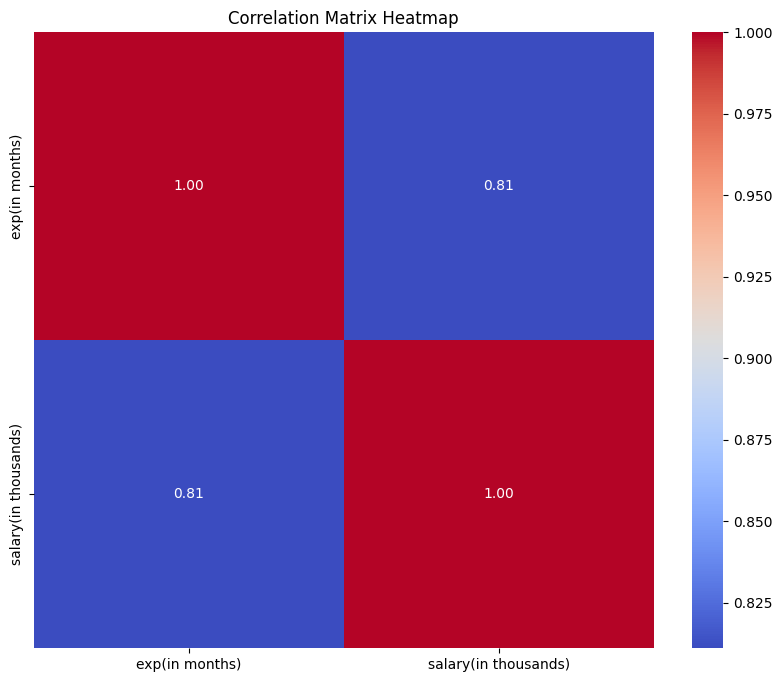

In [7]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
# Exclude non-numeric columns from the correlation matrix
numeric_cols = data.select_dtypes(include=[np.number]).columns
correlation_matrix = data[numeric_cols].corr()

# Plot heatmap untu matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
# Memisahkan fitur dan label
X = data.iloc[:, 0].values.reshape(-1, 1)  # Memastikan X adalah array 2D
y = data.iloc[:, 1].values


In [13]:
# Membagi data ke test dan training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize ANN
regression_model = Sequential()

# Add input layer and hidden layers
regression_model.add(Dense(units=10, kernel_initializer='uniform', activation='relu'))
regression_model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))

# Add output layer
regression_model.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))

# Compile the model for regression
regression_model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model to training data
regression_model.fit(X_train, y_train, batch_size=8, epochs=150)

# Predict on test data
y_pred = regression_model.predict(X_test)

Epoch 1/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 780.8663  
Epoch 2/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - loss: 741.1219
Epoch 3/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 614.9191
Epoch 4/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 345.4011 
Epoch 5/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - loss: 131.0038
Epoch 6/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 47.6364
Epoch 7/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - loss: 33.2719
Epoch 8/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 27.5056
Epoch 9/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 26.2928
Epoch 10/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 26.3866
Epoch 11/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - loss: 27.8964
Epoch 12/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - loss: 27.1994
Epoch 13/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - loss: 27.1021
Epoch 14/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 28.88

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate RMSE
rmse_modified = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE
mae_modified = mean_absolute_error(y_test, y_pred)

# Calculate R^2
r_squared = r2_score(y_test, y_pred)

# Print modified metrics
print("Root Mean Square Error (RMSE):", rmse_modified)
print("Mean Absolute Error (MAE):", mae_modified)
print("R-squared (R^2):", r_squared)

Root Mean Square Error (RMSE): 4.712881891882799
Mean Absolute Error (MAE): 3.7166166627980193
R-squared (R^2): 0.7483647704816883


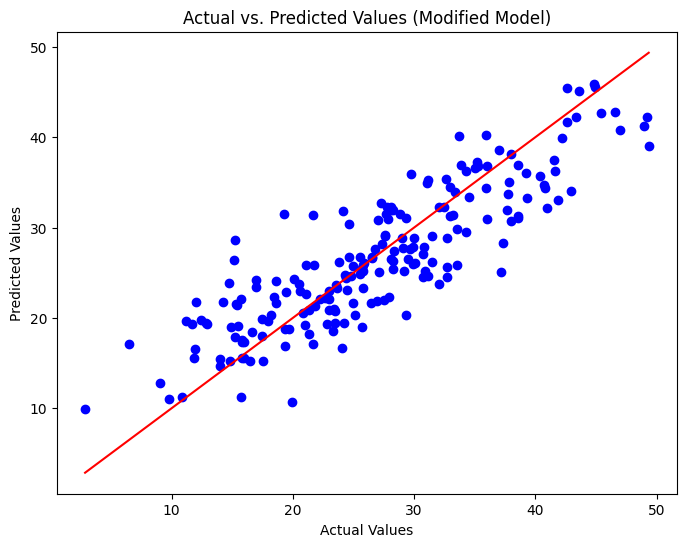

In [19]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') 
plt.title('Actual vs. Predicted Values (Modified Model)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
